### 1. Check Columns 
base_month : 기준년월<br>

leis_sports_cnt : 레저스포츠<br>

ref_view_cnt : 휴양 및 관람<br>

meet_work_cnt : 회의 및 업무<br>

visit_rel_cnt : 친지방문<br>

edu_trip_cnt : 교육여행<br>

etc_cnt : 기타방문<br>

total_visit_cnt : 총 입도객수

In [38]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [31]:
# dataset
df_d = pd.read_csv('./data/data.csv')
columns = list(df_d)

In [ ]:
df_d.info()

In [ ]:
# Change base_month type to date
df_d['base_month'] = df_d['base_month'].astype('str')
df_d['base_month'] = df_d['base_month'].apply(lambda x: datetime.datetime.strptime(x, "%Y%m"))

In [ ]:
df_d.head()

In [ ]:
df_d.describe()

In [ ]:
# Check NAN data
for col in df_d.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_d[col].isnull().sum() / df_d[col].shape[0]))
    print(msg)

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_43146/1860467460.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_d['ref_view_cnt'])


<AxesSubplot:xlabel='ref_view_cnt', ylabel='Density'>

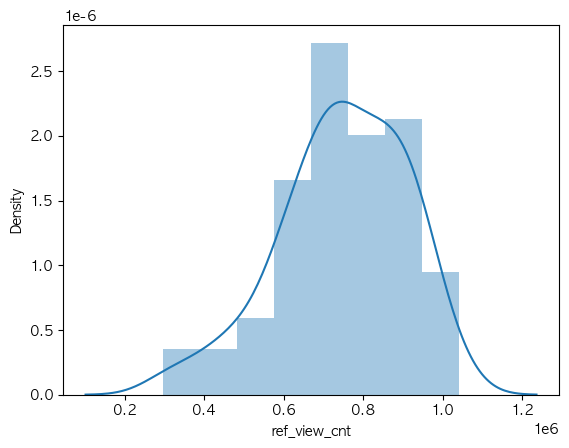

In [4]:
#histogram
sns.distplot(df_d['ref_view_cnt'])

#### histogram insight
- 정규분포에서 벗어난다.
- 첨도형이다.
- 정점을 가진다.

In [5]:
#skewness and kurtosis
print("Skewness: %f" % df_d['ref_view_cnt'].skew())
print("Kurtosis: %f" % df_d['ref_view_cnt'].kurt())

Skewness: -0.581173
Kurtosis: 0.084099


### Relationship with numerical variables

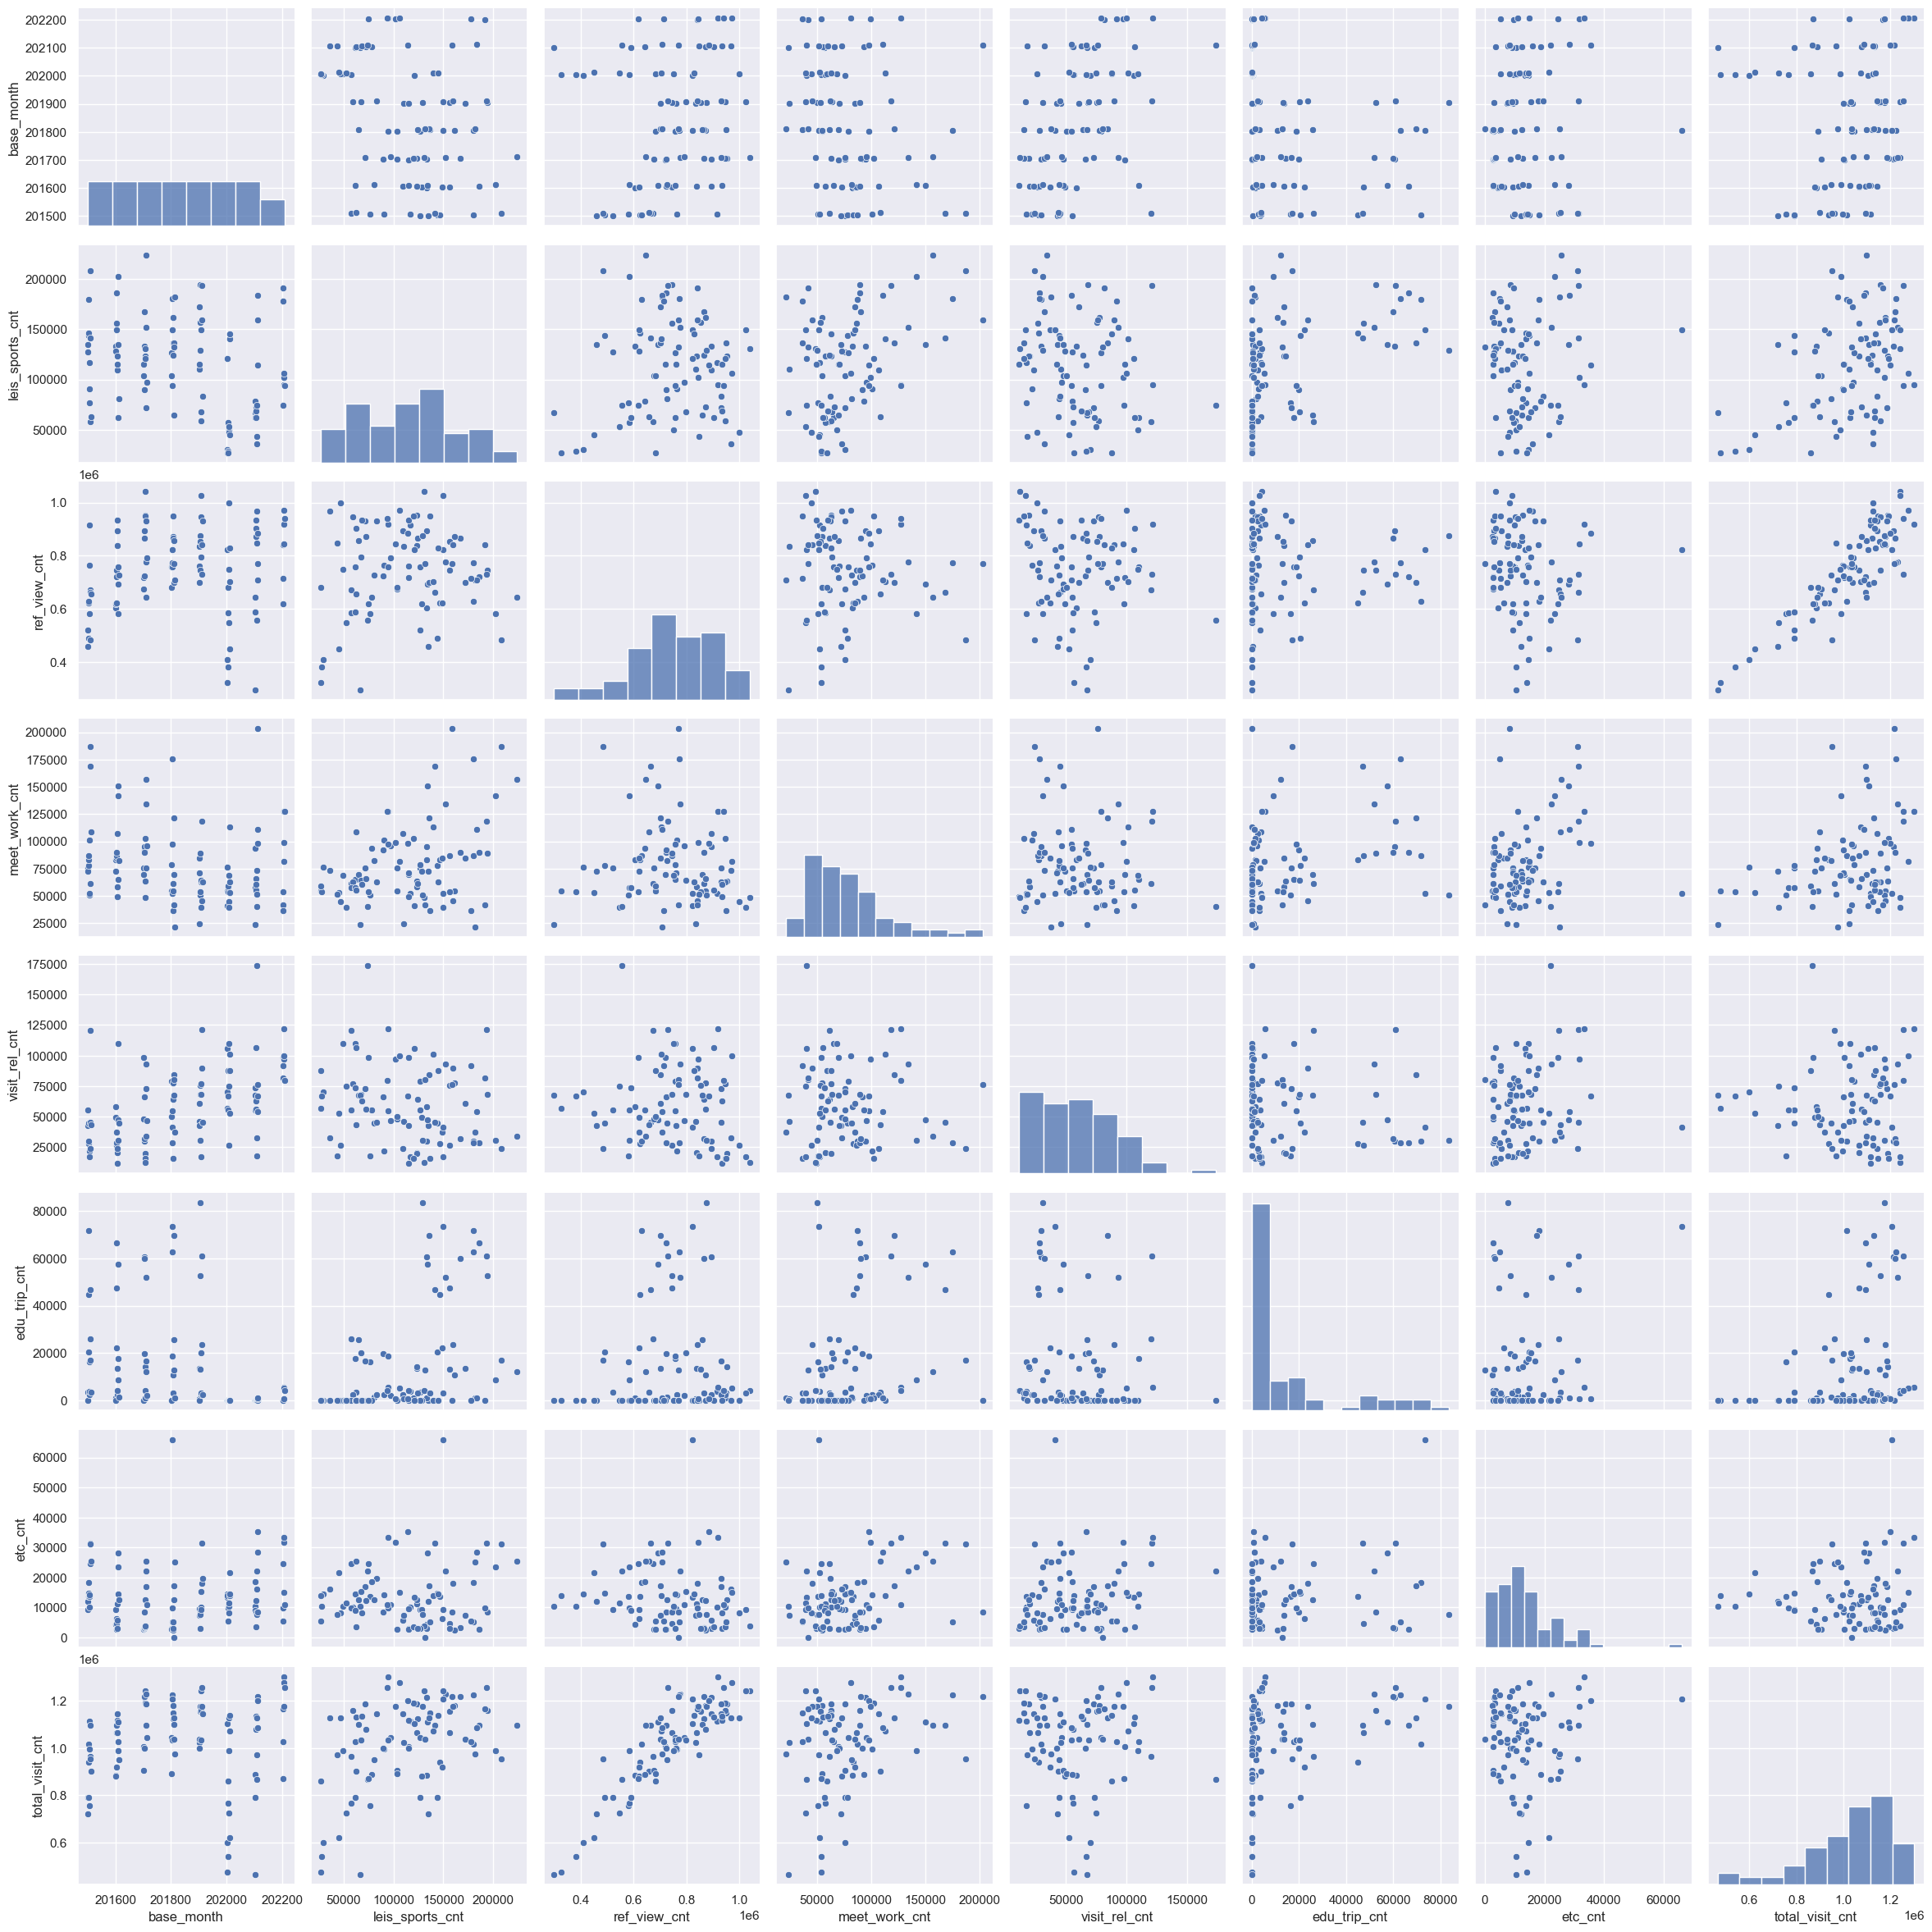

In [6]:
#scatterplot
sns.set()
sns.pairplot(df_d, height = 3)
plt.show();

#### scatter plot insight
- 레저 스포츠 목적에서 선형 관계를 가진다.
- 휴양 및 관람 목적에서 더 뚜렷한 선형 관계를 가진다.

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

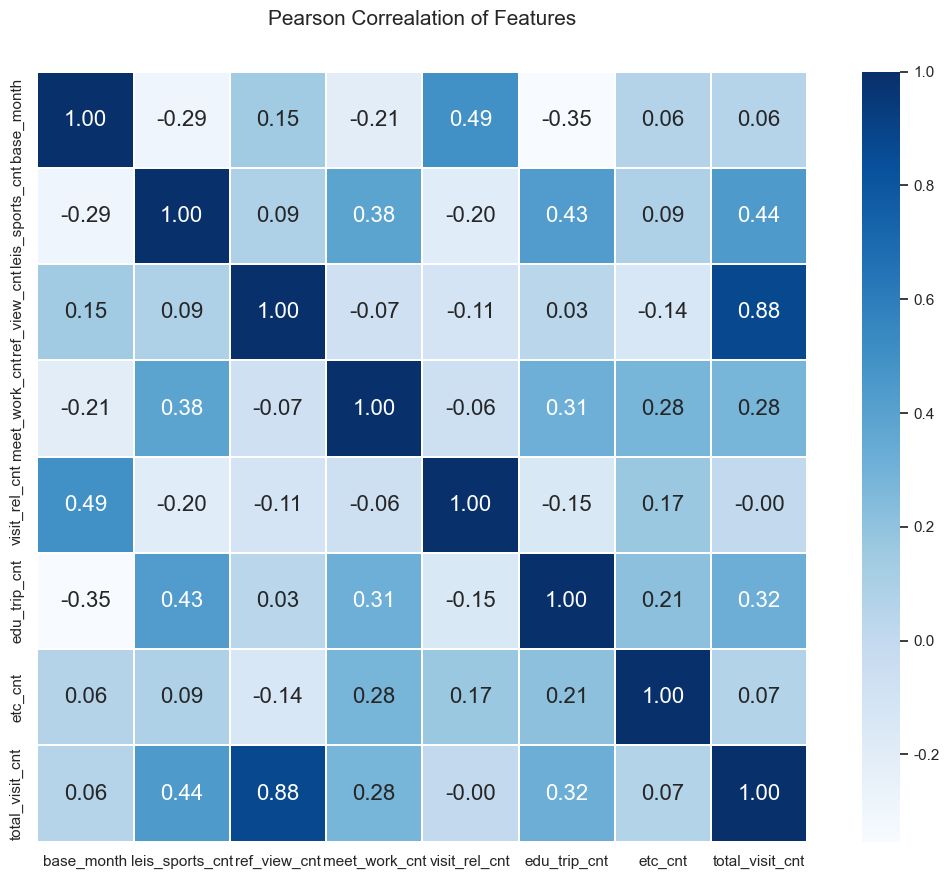

In [7]:
# heatmap
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(df_d.astype(int).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

휴가 및 관람 목적 -> 제주도 입도객의 수

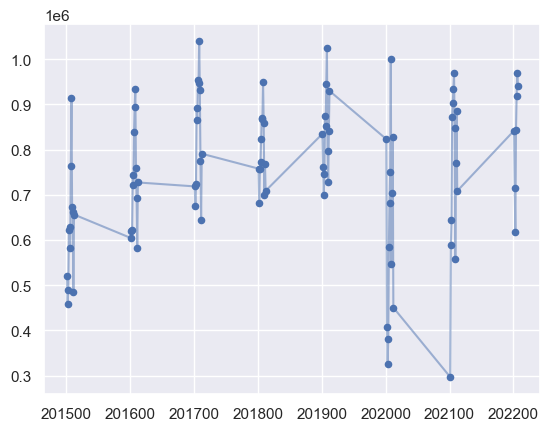

In [8]:
x = df_d['base_month']
y = df_d['ref_view_cnt']
plt.scatter(x, y, c = 'b', s = 20)
plt.plot(x, y, c = 'b', alpha = 0.5)

## 내국인 입도자 수 분석

In [9]:
# dataset
columns = ['base_month', 'individual_trip', 'part_package', 'package', 'leis_sports_cnt', 'meet_work_cnt', 'ref_view_cnt', 'visit_rel_cnt', 'edu_trip_cnt', 'etc_cnt', '데이터기준일자']
def combine_data(start_year, end_year):
    df_domestic = pd.read_csv(f'./data/domestic_{start_year}.csv', encoding='cp949', on_bad_lines='skip')
    df_domestic.columns = columns
    for i in range(start_year + 1, end_year + 1):
        df_domestic_section = pd.read_csv(f'./data/domestic_{i}.csv', encoding='cp949', on_bad_lines='skip')
        df_domestic_section.columns = columns
        df_domestic = pd.concat([df_domestic, df_domestic_section], ignore_index=True)
    return df_domestic

In [10]:
df_domestic = combine_data(2015, 2021)
df_domestic = df_domestic.drop(columns='데이터기준일자')
df_domestic['ref_view_cnt'] = df_domestic['individual_trip'] + df_domestic['part_package'] + df_domestic['package'] + df_domestic['ref_view_cnt']
df_domestic = df_domestic.drop(columns=['individual_trip', 'part_package', 'package'])
df_domestic['total_visit_cnt'] = df_domestic.sum(axis=1)
df_domestic

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_43146/2266494078.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_domestic['total_visit_cnt'] = df_domestic.sum(axis=1)


,base_month,leis_sports_cnt,meet_work_cnt,ref_view_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,2015-01,127063,75791,1313972,55457,3621,9432,1585336
1,2015-02,134718,72552,1180619,43058,202,12025,1443174
2,2015-03,143528,78294,1281718,44581,20466,14841,1583428
3,2015-04,146259,83467,1562412,27927,44893,13662,1878620
4,2015-05,179944,87166,1643818,29779,71746,18225,2030678
...,...,...,...,...,...,...,...,...
78,2021-08,43445,51875,1818485,18128,0,7703,1939636
79,2021-09,74382,40312,1424271,173601,0,22176,1734742
80,2021-10,159009,203258,1989117,76544,15,8367,2436310
81,2021-11,114236,97990,2084847,66931,703,35387,2400094


In [11]:
# Change base_month type to date
df_domestic['base_month'] = df_domestic['base_month'].astype('str')
df_domestic['base_month'] = df_domestic['base_month'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m"))

In [12]:
df_domestic

,base_month,leis_sports_cnt,meet_work_cnt,ref_view_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,2015-01-01,127063,75791,1313972,55457,3621,9432,1585336
1,2015-02-01,134718,72552,1180619,43058,202,12025,1443174
2,2015-03-01,143528,78294,1281718,44581,20466,14841,1583428
3,2015-04-01,146259,83467,1562412,27927,44893,13662,1878620
4,2015-05-01,179944,87166,1643818,29779,71746,18225,2030678
...,...,...,...,...,...,...,...,...
78,2021-08-01,43445,51875,1818485,18128,0,7703,1939636
79,2021-09-01,74382,40312,1424271,173601,0,22176,1734742
80,2021-10-01,159009,203258,1989117,76544,15,8367,2436310
81,2021-11-01,114236,97990,2084847,66931,703,35387,2400094


In [13]:
# Check NAN data
for col in df_domestic.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_domestic[col].isnull().sum() / df_domestic[col].shape[0]))
    print(msg)

columns: base_month	 Percent of NaN value: 0.00%
columns: leis_sports_cnt	 Percent of NaN value: 0.00%
columns: meet_work_cnt	 Percent of NaN value: 0.00%
columns: ref_view_cnt	 Percent of NaN value: 0.00%
columns: visit_rel_cnt	 Percent of NaN value: 0.00%
columns: edu_trip_cnt	 Percent of NaN value: 0.00%
columns:    etc_cnt	 Percent of NaN value: 0.00%
columns: total_visit_cnt	 Percent of NaN value: 0.00%


/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_43146/1262697581.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_domestic['total_visit_cnt'])


<AxesSubplot:xlabel='total_visit_cnt', ylabel='Density'>

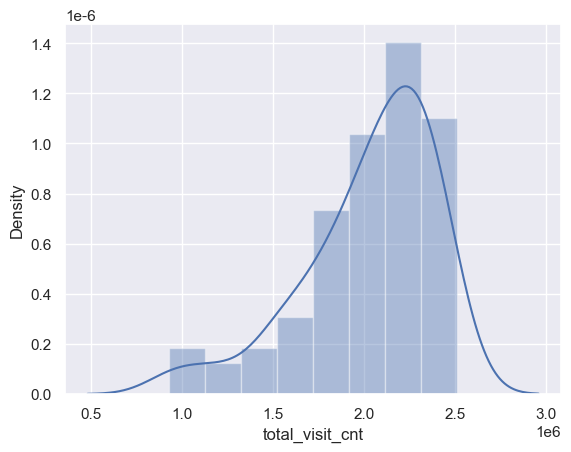

In [14]:
#histogram
sns.distplot(df_domestic['total_visit_cnt'])

In [15]:
#skewness and kurtosis
print("Skewness: %f" % df_domestic['total_visit_cnt'].skew())
print("Kurtosis: %f" % df_domestic['total_visit_cnt'].kurt())

Skewness: -1.144548
Kurtosis: 1.032554


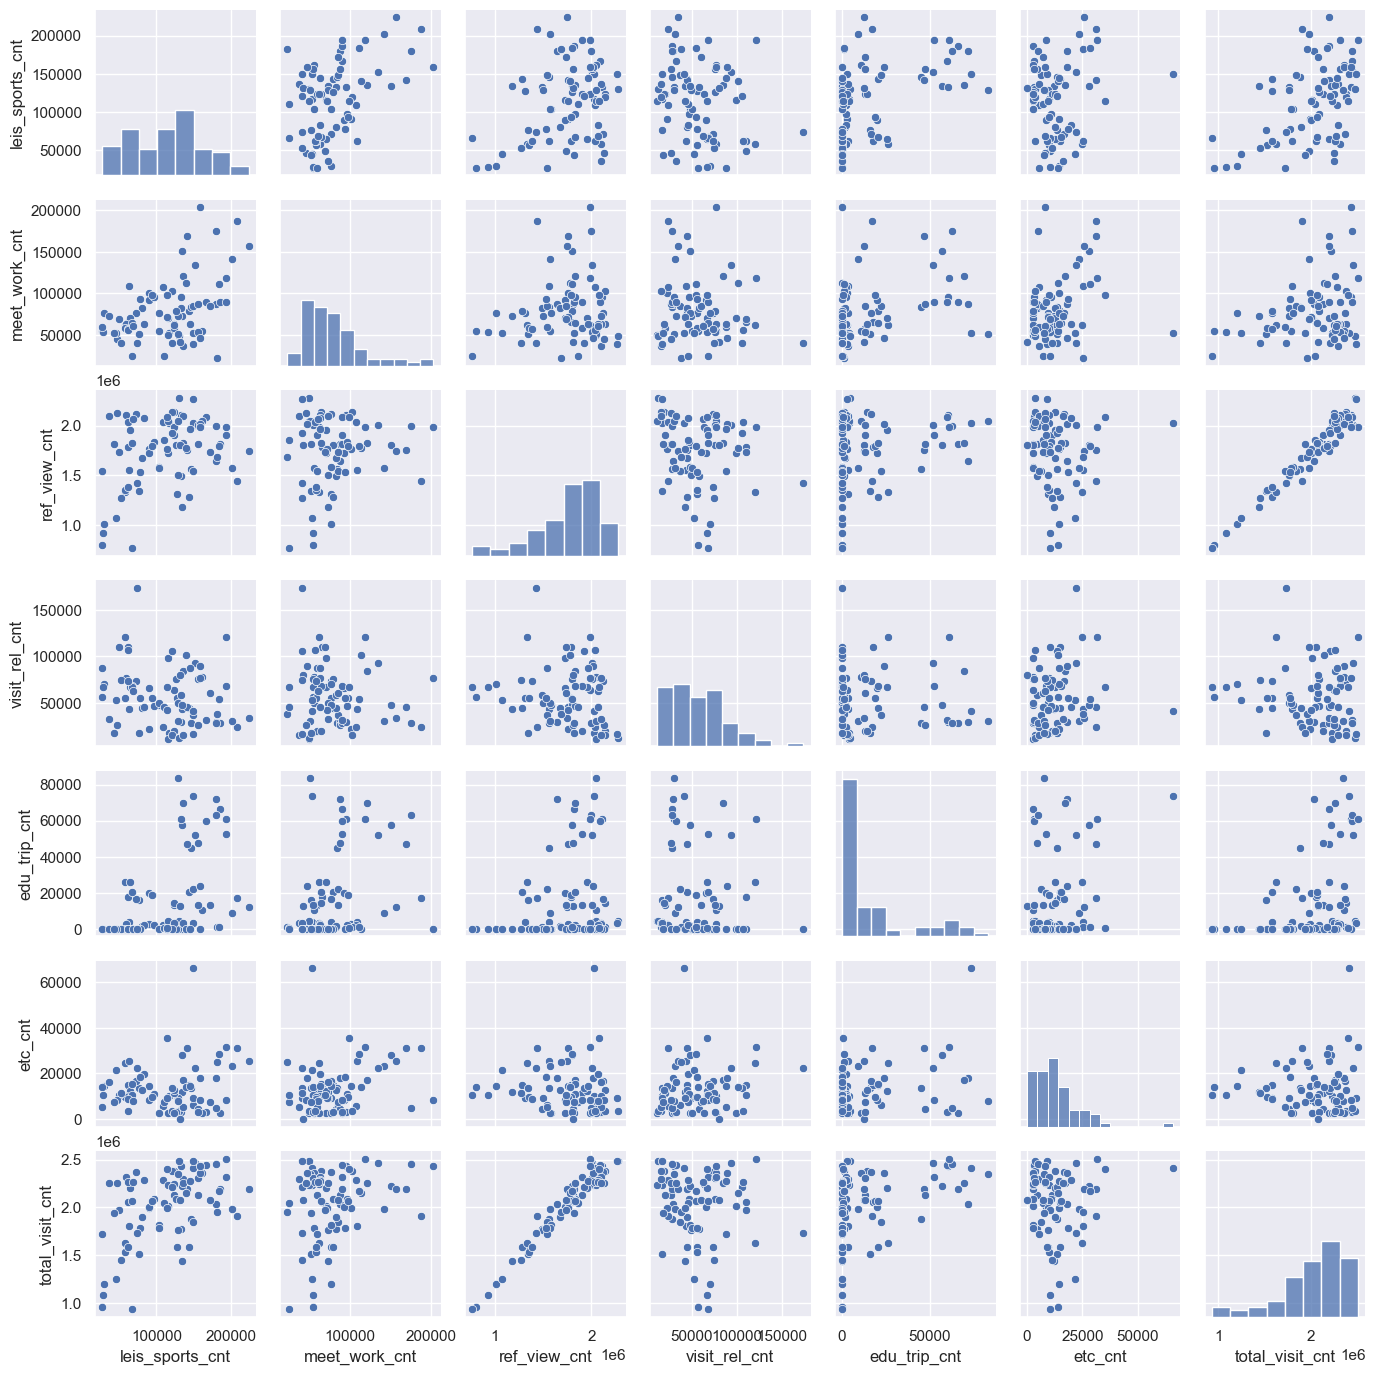

In [16]:
#scatterplot
sns.set()
sns.pairplot(df_domestic, height = 2)
plt.show();

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

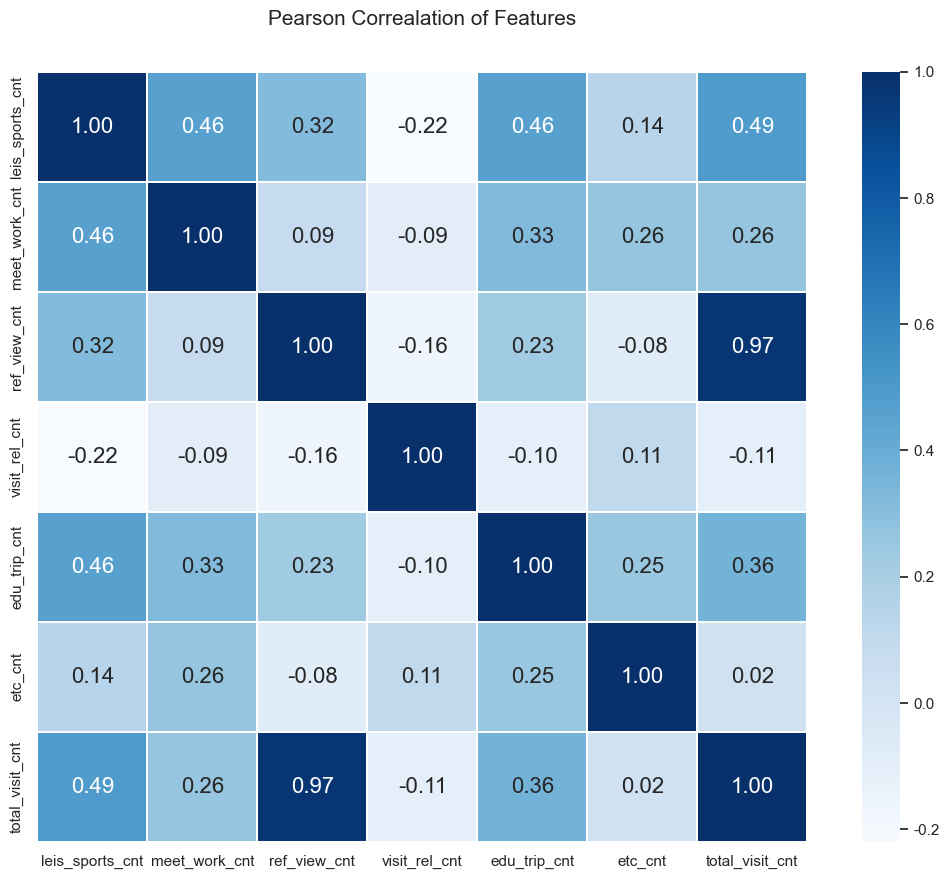

In [17]:
# heatmap
colormap = plt.cm.Blues
plt.figure(figsize=(14, 10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(df_domestic.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

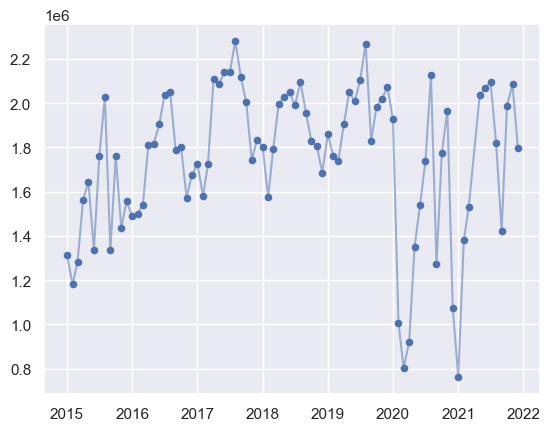

In [18]:
x = df_domestic['base_month']
y = df_domestic['ref_view_cnt']
plt.scatter(x, y, c = 'b', s = 20)
plt.plot(x, y, c = 'b', alpha = 0.5)

In [19]:
df_domestic = combine_data(2015, 2021)
df_domestic = df_domestic.drop(columns='데이터기준일자')
df_domestic['ref_view_cnt'] = df_domestic['individual_trip'] + df_domestic['part_package'] + df_domestic['package'] + df_domestic['ref_view_cnt']
df_domestic = df_domestic.drop(columns=['individual_trip', 'part_package', 'package'])
df_domestic['total_visit_cnt'] = df_domestic.sum(axis=1)
df_domestic

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_43146/2266494078.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_domestic['total_visit_cnt'] = df_domestic.sum(axis=1)


,base_month,leis_sports_cnt,meet_work_cnt,ref_view_cnt,visit_rel_cnt,edu_trip_cnt,etc_cnt,total_visit_cnt
0,2015-01,127063,75791,1313972,55457,3621,9432,1585336
1,2015-02,134718,72552,1180619,43058,202,12025,1443174
2,2015-03,143528,78294,1281718,44581,20466,14841,1583428
3,2015-04,146259,83467,1562412,27927,44893,13662,1878620
4,2015-05,179944,87166,1643818,29779,71746,18225,2030678
...,...,...,...,...,...,...,...,...
78,2021-08,43445,51875,1818485,18128,0,7703,1939636
79,2021-09,74382,40312,1424271,173601,0,22176,1734742
80,2021-10,159009,203258,1989117,76544,15,8367,2436310
81,2021-11,114236,97990,2084847,66931,703,35387,2400094


In [20]:
df_o = pd.read_csv('./data/topic.csv', index_col=['Unnamed: 0'])

In [21]:
df_o['cnt'] = df_d['total_visit_cnt']

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_43146/3566670524.py:3: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()
Fontconfig warning: ignoring UTF-8: not a valid region tag
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


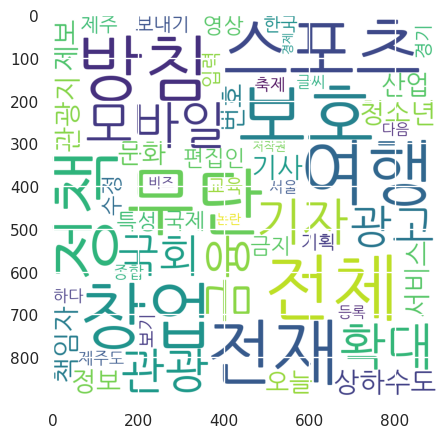

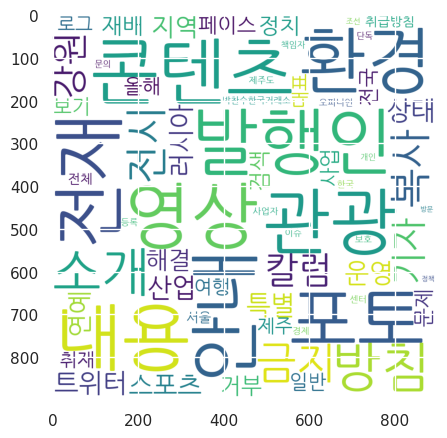

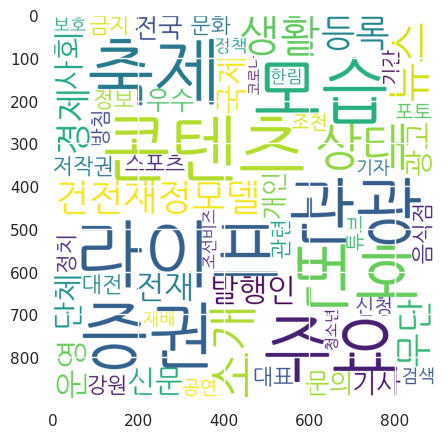

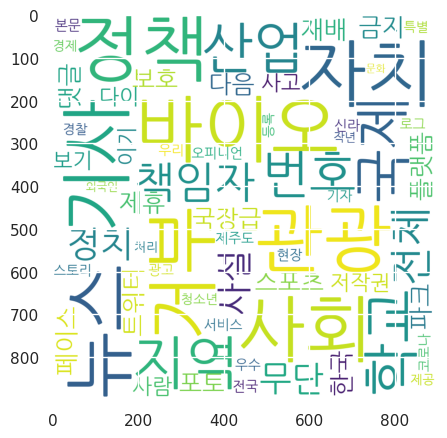

In [22]:
from wordcloud import WordCloud
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts() 
font_location = '/Users/jin-yulim/Library/Fonts/NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

for i in range(2, 6):
    wc = df_o.set_index(f'{i}').to_dict()['cnt']
    plt.figure(figsize=(5, 5))
    wordcloud = WordCloud(
        width=900,
        height=900,
        font_path = font_name,
        max_font_size=170,
        background_color='white'
    ).generate_from_frequencies(wc)
    plt.imshow(wordcloud)
    plt.show()

In [42]:
words = ()
for i in range(1, 6):
    words += tuple(df_o[f'{i}'])
words = list(set(words))

df = pd.get_dummies(df_o[['1', '2', '3', '4', '5']], prefix='', prefix_sep='')
df = df.loc[:,~df.columns.duplicated()].copy()
df['date'] = df_o['date']
df['cnt'] = df_o['cnt']
df

,검색,대표,번호,인터뷰,제주,한국,경기,경제,관광,관광지,...,작년,제공,제휴,처리,파크,플랫폼,학교,현장,date,cnt
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2015_01,792668
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2015_02,721587
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015_03,791714
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015_04,939295
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2015_05,1015339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021_08,969818
80,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021_09,867371
81,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021_10,1218155
82,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021_11,1200047


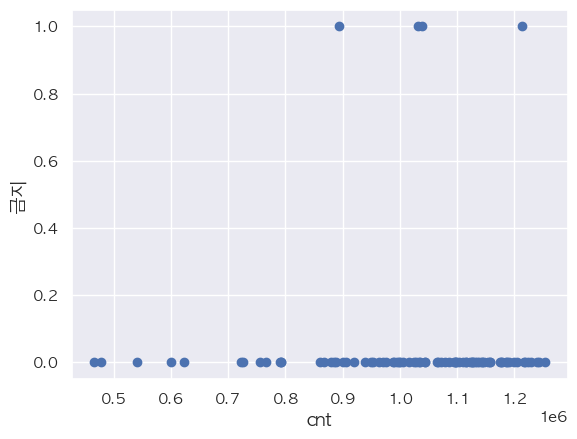

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = df['cnt'], y = df['금지'])
plt.ylabel('금지', fontsize=13)
plt.xlabel('cnt', fontsize=13)
plt.show()

> 금지라는 토픽이 추출되었을 때 cnt의 동향